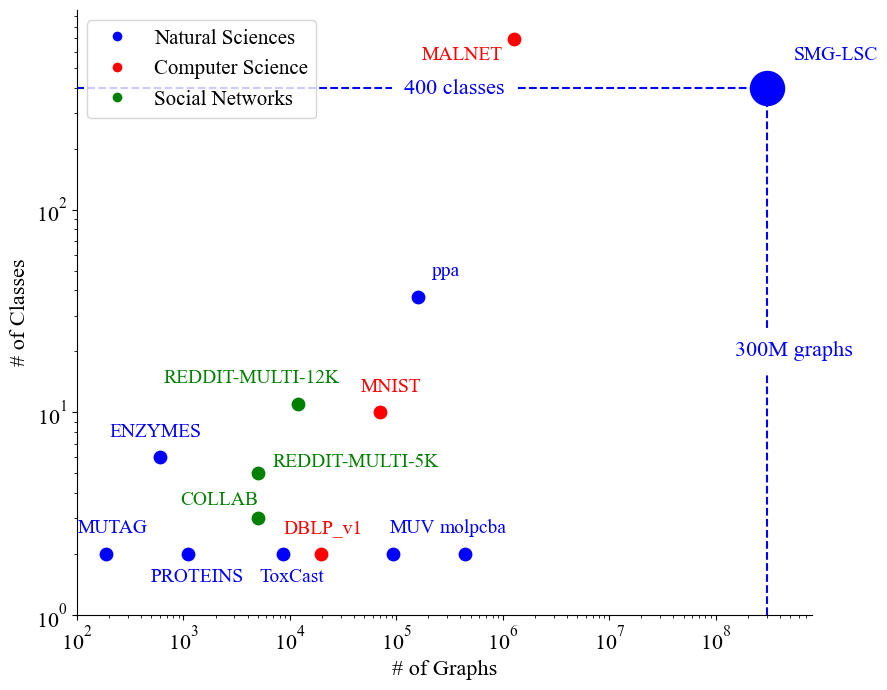

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'Times']  # list of preferred fonts
mpl.rcParams['text.usetex'] = False  # set to True if you want to use LaTeX for all text


# Increase font sizes for axes labels, tick labels, and legend fonts
mpl.rcParams['axes.labelsize'] = 16   # x and y axis label fonts
mpl.rcParams['xtick.labelsize'] = 16     # x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 16     # y-axis tick labels
mpl.rcParams['legend.fontsize'] = 15     # Legend font size

# Define each dataset as a tuple:
# (Dataset Name, # of Graphs, Target Classes, Application Category)
datasets = [
    ("MUTAG", 188, 2, "Natural Sciences"),
    ("ENZYMES", 600, 6, "Natural Sciences"), 
    ("PROTEINS", 1113, 2, "Natural Sciences"),   
    ("REDDIT-MULTI-5K", 4999, 5, "Social Networks"),
    ("COLLAB", 5000, 3, "Social Networks"), 
    ("ToxCast", 8576, 2, "Natural Sciences"),
    ("DBLP_v1", 19456, 2, "Computer Science"),
    ("REDDIT-MULTI-12K", 11929, 11, "Social Networks"),
    ("MUV", 93087, 2, "Natural Sciences"), 
    ("MNIST", 70000, 10, "Computer Science"), 
    ("ppa", 158100, 37, "Natural Sciences"),
    ("molpcba", 437929, 2, "Natural Sciences"),
    ("MALNET", 1262024, 696, "Computer Science"),
    ("SMG-LSC", 3*1e8, 400,"Natural Sciences")
]

# Define a color mapping for the application categories
color_map = {
    "Natural Sciences": "blue",
    "Computer Science": "red",
    "Social Networks": "green"
}

# Create the plot
fig, ax = plt.subplots(figsize=(9, 7))

# Use a logarithmic scale for the x-axis (for # of Graphs)
ax.set_xscale('log')
ax.set_yscale('log')

# Dictionary to store manual offsets for each dataset label
# Format: "Dataset Name": (x_offset, y_offset)
manual_offsets = {
    "MUTAG": (30, 15),
    "ENZYMES": (30, 15),
    "PROTEINS":(40, -20),
    "REDDIT-MULTI-5K": (130,5),
    "COLLAB": (0, 10),
    "ToxCast": (30, -20),
    "DBLP_v1":(30, 15),
    "REDDIT-MULTI-12K": (30, 15),
    "MUV": (30, 15),
    "MNIST":(30, 15), 
    "ppa": (30, 15),
    "molpcba": (30, 15),
    "MALNET": (-8, -15),
    "SMG-LSC": (80, 20)
}

# Plot each dataset and annotate with its name
for name, graphs, targets, app in datasets:
    color = color_map.get(app, "black")
    if name!="SMG-LSC":
        ax.scatter(graphs, targets, color=color, s=80)  # s=50 sets marker size
    else:
        ax.scatter(graphs, targets, color=color, s=600)  # s=50 sets marker size

    # Annotate the point with the dataset name, offset slightly to top left
    offset = manual_offsets.get(name, (-5, 5))
    ax.annotate(name, (graphs, targets),
                textcoords="offset points", xytext=offset,
                ha='right', fontsize=14, color=color)

# Set labels and title
ax.set_xlabel("# of Graphs")
ax.set_ylabel("# of Classes") 
# Create a legend for the categories using custom handles
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat,
               markerfacecolor=color_map[cat], markersize=8)
    for cat in color_map
]
ax.legend(handles=legend_handles)

# ----------------------- Dashed Lines for SMG-LSC -----------------------
# We'll draw a dashed horizontal line at y = 400 and a dashed vertical line at x = 3e6
# from axis minimum (1 on log scale) to the SMG-LSC coordinate.

SMG_x = 3e8
SMG_y = 400
line_color = "blue"   # or pick any color you prefer

# Horizontal dashed line (from x=1 to x=SMG_x at y=SMG_y)
ax.plot([1, SMG_x], [SMG_y, SMG_y], linestyle="--", color=line_color, zorder=1)

# Vertical dashed line (from y=1 to y=SMG_y at x=SMG_x)
ax.plot([SMG_x, SMG_x], [1, SMG_y], linestyle="--", color=line_color, zorder=1)

# Compute midpoints in log scale (the geometric mean) for each line
x_mid = 10 ** ((np.log10(1) + np.log10(SMG_x)) / 2.0)   # horizontal line midpoint
y_mid = 10 ** ((np.log10(1) + np.log10(SMG_y)) / 2.0)   # vertical line midpoint

# Label the dashed lines in the middle
# "3M graphs" near the horizontal line, "400 classes" near the vertical line
 
# Label the dashed lines with bounding boxes
txt_h = ax.text(x_mid*20, SMG_y*0.88, "400 classes",
                color=line_color, fontsize=16, ha="center", va="bottom", zorder=5)
txt_h.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.5'))

txt_v = ax.text(SMG_x*0.5, y_mid, "300M graphs",
                color=line_color, fontsize=16, ha="left", va="center", zorder=5)
txt_v.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.5'))

# --------------------------- Legend -------------------------------------
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat,
               markerfacecolor=color_map[cat], markersize=8)
    for cat in color_map
]
ax.legend(handles=legend_handles, loc="upper left")

# Remove top and right spines to leave only x and y axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim(left=1e2)
ax.set_ylim(bottom=1)
plt.tight_layout()
plt.savefig("DatasetComparison_NgraphVsClasses.pdf")
plt.show()


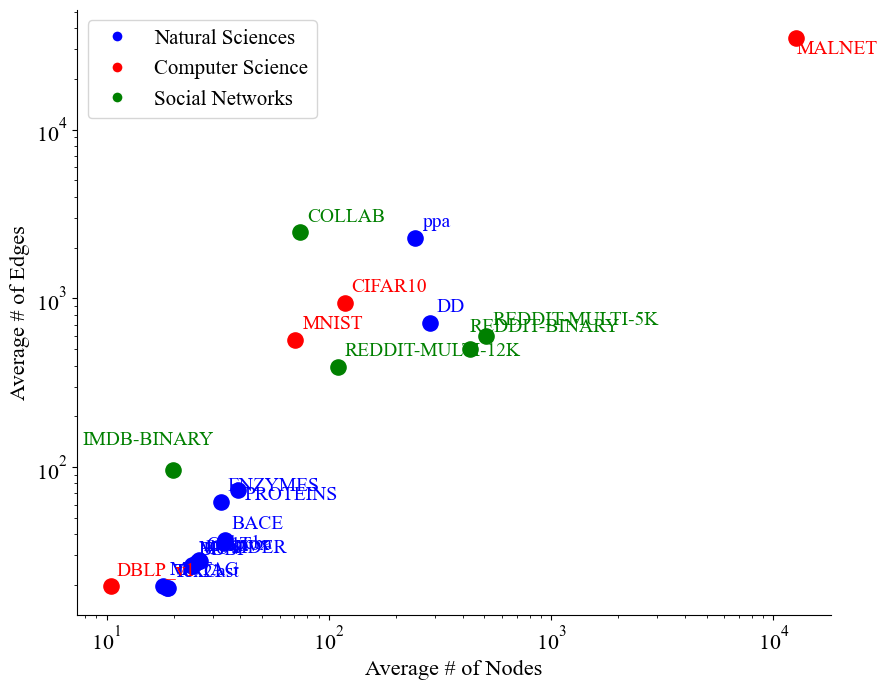

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# ------------------ Matplotlib/Font Configuration ------------------
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman', 'Times']
mpl.rcParams['text.usetex'] = False

# Increase font sizes
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 15

# --------------------------------------------------------------------
# We create a new list for the (Dataset, AvgNodes, AvgEdges, Category).
# The Category is assigned the same as your previous code.
#
# The data are taken from the new columns in your LaTeX table:
# "Avg #Nodes" and "Avg #Edges"
#
# Any dataset with "-" for node/edge is omitted (e.g., SMG-LSC).
# --------------------------------------------------------------------

datasets_nodes_edges = [
    ("MUTAG",           17.9,    19.8,   "Natural Sciences"),
    ("ENZYMES",         32.6,    62.1,   "Natural Sciences"),
    ("IMDB-BINARY",     19.8,    96.5,   "Social Networks"),  # or Natural Sciences if you prefer
    ("PROTEINS",        39.1,    72.8,   "Natural Sciences"),
    ("DD",             284.3,   715.7,   "Natural Sciences"), # originally "D&D"
    ("SIDER",          33.6,    35.4,    "Natural Sciences"),
    ("ClinTox",        26.2,    27.9,    "Natural Sciences"), 
    ("BACE",           34.1,    36.9,    "Natural Sciences"),
    ("REDDIT-BINARY", 429.6,   497.8,    "Social Networks"),
    ("BBBP",           24.1,    26.0,    "Natural Sciences"),
    ("REDDIT-MULTI-5K", 508.5,  594.9,    "Social Networks"),
    ("COLLAB",         74.5,   2457.8,   "Social Networks"),
    ("Tox21",          18.6,    19.3,    "Natural Sciences"),
    ("ToxCast",        18.8,    19.3,    "Natural Sciences"),
    ("DBLP_v1",        10.5,    19.7,    "Computer Science"),
    ("molhiv",         25.5,    27.5,    "Natural Sciences"),
    ("REDDIT-MULTI-12K",110.0, 391.4,    "Social Networks"),
    ("MUV",            24.2,    26.3,    "Natural Sciences"),
    ("CIFAR10",       117.63,  941.1,    "Computer Science"),
    ("MNIST",          70.57,  564.53,   "Computer Science"),
    ("ppa",           243.4,  2266.1,    "Natural Sciences"),
    ("molpcba",        26.0,    28.1,    "Natural Sciences"),
    ("MALNET",      12678.0, 35167.0,    "Computer Science"),
    # SMG-LSC is omitted because its AvgNodes/AvgEdges are "-" in the table
]

# ------------------ Color Mapping (same as your code) ------------------
color_map = {
    "Natural Sciences": "blue",
    "Computer Science": "red",
    "Social Networks": "green"
}

# ------------------ Manual Offsets for Label Placement ------------------
# Adjust these if labels overlap or to place them more nicely
manual_offsets = {
    "MUTAG":         (5, 5),
    "ENZYMES":       (5, 5),
    "IMDB-BINARY":   (-65, 15),
    "PROTEINS":      (5, -10),
    "DD":            (5, 5),
    "SIDER":         (5, -10),
    "ClinTox":       (5, 5), 
    "BACE":          (5, 5),
    "REDDIT-BINARY": (0, 10),
    "BBBP":          (5, 5),
    "REDDIT-MULTI-5K":   (5, 5),
    "COLLAB":        (5, 5),
    "Tox21":         (5, 5),
    "ToxCast":       (5, 5),
    "DBLP_v1":       (4, 5),
    "molhiv":        (5, 5),
    "REDDIT-MULTI-12K": (5, 5),
    "MUV":           (5, 5),
    "CIFAR10":       (5, 5),
    "MNIST":         (5, 5),
    "ppa":           (5, 5),
    "molpcba":       (5, 5),
    "MALNET":        (0, -15),
}

# ------------------ Plot Setup ------------------
fig, ax = plt.subplots(figsize=(9, 7))

# Use log scale for x and y to accommodate large ranges
ax.set_xscale('log')
ax.set_yscale('log')

# Plot each dataset
for name, avg_nodes, avg_edges, category in datasets_nodes_edges:
    color = color_map.get(category, "black")
    
    # Scatter point
    ax.scatter(avg_nodes, avg_edges, color=color, s=120)
    
    # Annotate label
    offset = manual_offsets.get(name, (5, 5))
    ax.annotate(
        name, (avg_nodes, avg_edges),
        textcoords="offset points",
        xytext=offset,
        ha='left',
        va='bottom',
        fontsize=14,
        color=color
    )

# Axis labels
ax.set_xlabel("Average # of Nodes")
ax.set_ylabel("Average # of Edges")

# Build a legend from your categories
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat,
               markerfacecolor=color_map[cat], markersize=8)
    for cat in color_map
]
ax.legend(handles=legend_handles, loc="best")

# Remove top/right spines (cleaner look)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

# If you like, save the figure:
# plt.savefig("DatasetComparison_AvgNodesVsAvgEdges.pdf")

plt.show()
